### Passos

1. Inicialização: Definir os coeficientes θ0 e θ1 e a taxa de aprendizado(α)
    - Obs: deve ser pequena para o algoritmo não divergir
2. Passo iterativo: (Calcular as minimizações várias vezes)

    2.1 Calcular a predição: y^(i) = θ0 + θ1x(i)

    2.2 Calcular o erro p/ cada ponto de dados: error(i) = y^(i) − y(i)

    2.3 Atualizar os coeficientes θ0 e θ1 usando o Gradiente Descendente:

    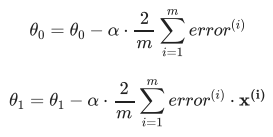

3. Convergência -> até o mínimo:
    - Monitorar verificando se o MSE diminui a cada iteração (se diminui, o algoritmo se aproxima dos coeficientes ideais)

4. Resultados: Valores finais dos θ0 e θ1 representam a reta de Regressão Linear ajustada que minimiza o MSE








In [106]:
# Exemplo: Salário de funcionários por meses trabalhados

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame (
    {
        'Meses': [3.0, 6.0, 9.0, 12.0, 18.0, 24.0, 30.0, 36.0],
        'Salario': [2000.00, 2300.00, 2600.00, 3000.00, 3500.00, 4000.00, 4200.00, 4500.00]
    }
)

# Normalizando os dados
df['Meses'] = df['Meses']/1000
df['Salario'] = df['Salario']/1000

# 1. Inicializando os parâmetros
theta0 = 0
theta1 = 0
alfa = 0.0001 # taxa de aprendizado

m = df.shape[0]

numero_iteracoes = 20000

historico_mse = list()

# 2. Passo iterativo
for i in range(numero_iteracoes):
    # 2.1 Calculando as previsões y^(i) = θ0 + θ1x(i)
    y_pred = theta0 + theta1 * df['Meses']

    # 2.2 Calculando o erro
    erros = y_pred - df['Salario']

    # 2.3 ATUALIZANDO OS COEFICIENTES usando DERIVADAS PARCIAIS
    theta0_gradiente = (2/m) * sum(erros)
    theta1_gradiente = (2/m) * sum(erros * df['Meses'])
    theta0 = theta0 - alfa * theta0_gradiente
    theta1 = theta1 - alfa * theta1_gradiente

    # Calculando custo MSE e armazenando para análise
    historico_mse.append(np.mean(erros**2))

In [107]:
# Resultados
print(f'Coeficiente theta0: {theta0:.2f}')
print(f'Coeficiente theta1: {theta1:.2f}')
print(f'Erro Quadrático Médio (MSE): {historico_mse[numero_iteracoes-1]:.2f}')

Coeficiente theta0: 3.20
Coeficiente theta1: 0.09
Erro Quadrático Médio (MSE): 0.76


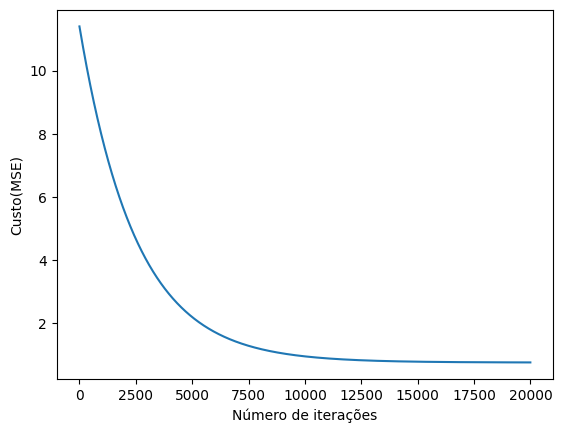

In [108]:
# Visualizar a evolução do custo
plt.plot(range(numero_iteracoes), historico_mse)
plt.xlabel('Número de iterações')
plt.ylabel('Custo(MSE)')
plt.show()

[3201.6729701074682, 3201.9525139011594, 3202.2320576948505, 3202.5116014885416, 3203.0706890759243, 3203.6297766633065, 3204.1888642506888, 3204.747951838071]


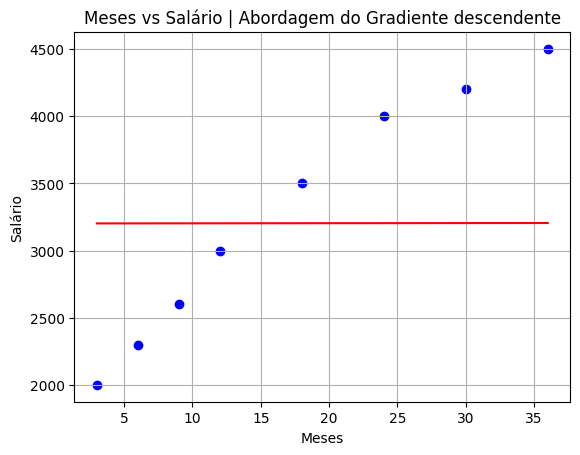

In [109]:
# Mostrando a linha da Regressão Linear ajustada com o Gradiente Descendente
df['Meses'] = df['Meses']*1000
df['Salario'] = df['Salario']*1000

linha_de_regressao = [theta0 * 1000 + (theta1 * x) for x in df['Meses']]

print(linha_de_regressao)

plt.scatter(df.Meses, df.Salario, color='b')
plt.plot(df.Meses, linha_de_regressao, color='r')
plt.title('Meses vs Salário | Abordagem do Gradiente descendente')
plt.xlabel('Meses')
plt.ylabel('Salário')
plt.grid()
plt.show()